#UE 3.8 - TP1 : SURVIE CLONOGENIQUE

In [1]:
#Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
#Importation des données
data = pd.read_excel('tp1_survie_clonogenique.xlsx')

print(data.head())

        Groupe1  Unnamed: 1   Unnamed: 2  Unnamed: 3  D1_Gy   Seed1  Compte1  \
0  Rayons gamma  Normoxique  Pas de DMSO         NaN    0.0   220.0     62.0   
1           NaN         NaN          NaN         NaN    1.0   320.0     88.0   
2      Groupe 2         NaN          NaN         NaN    2.0   610.0    112.0   
3  Ions carbone  Normoxique  Pas de DMSO         NaN    3.0   776.0    110.0   
4           NaN         NaN          NaN         NaN    4.0  1199.0     92.0   

   Unnamed: 7  Unnamed: 8    Moyenne1  ...  SF_norm3  Unnamed: 30  D4_Gy  \
0        72.0        88.0   74.000000  ...  1.000000          NaN    0.0   
1        84.0        92.0   88.000000  ...  0.882548          NaN    1.0   
2       114.0       119.0  115.000000  ...  0.768798          NaN    2.0   
3       111.0       114.0  111.666667  ...  0.614274          NaN    4.0   
4        96.0       116.0  101.333333  ...  0.375275          NaN    8.0   

    Seed4  Compte4  Unnamed: 34  Unnamed: 35   Moyenne4       

In [ ]:
#Variables
#Doses (Gy)
D1 = data['D1_Gy']
D2 = data['D2_Gy']
D3 = data['D3_Gy']
D4 = data['D4_Gy']

D1_clean = D1.dropna()
D2_clean = D2.dropna()
D3_clean = D3.dropna()
D4_clean = D4.dropna()

#Fractions de survie
SF1 = data['SF_norm1']
SF2 = data['SF_norm2']
SF3 = data['SF_norm3']
SF4 = data['SF_norm4']

SF1_clean = SF1.dropna()
SF2_clean = SF2.dropna()
SF3_clean = SF3.dropna()
SF4_clean = SF4.dropna()

#Fonction LQM
def lqm(x,a,b):
  return np.exp(- a * x - b * x**2)

#Construction du modèle LQM pour chaque groupe
popt1, pcov1 = curve_fit(lqm, D1_clean, SF1_clean)
alpha1, beta1 = popt1
fit_doses1 = np.linspace(0, max(D1) + 1, 100)
fit_sf1 = lqm(fit_doses1, alpha1, beta1)

popt2, pcov2 = curve_fit(lqm, D2_clean, SF2_clean)
alpha2, beta2 = popt2
fit_doses2 = np.linspace(0, max(D2) + 1, 100)
fit_sf2 = lqm(fit_doses2, alpha2, beta2)

popt3, pcov3 = curve_fit(lqm, D3_clean, SF3_clean)
alpha3, beta3 = popt3
fit_doses3 = np.linspace(0, max(D3) + 1, 100)
fit_sf3 = lqm(fit_doses3, alpha3, beta3)

popt4, pcov4 = curve_fit(lqm, D4_clean, SF4_clean)
alpha4, beta4 = popt4
fit_doses4 = np.linspace(0, max(D4) + 1, 100)
fit_sf4 = lqm(fit_doses4, alpha4, beta4)

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


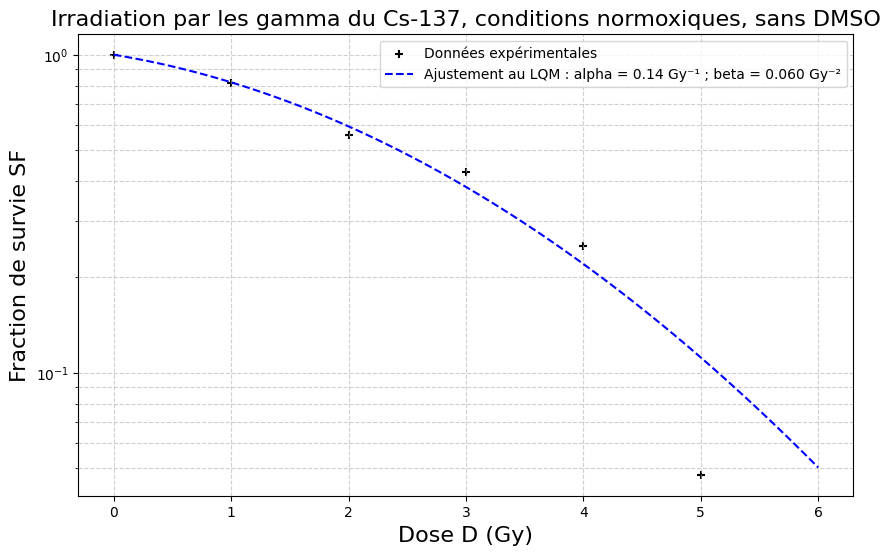

In [ ]:
#Graphe groupe 1
plt.figure(figsize=(10,6))
plt.scatter(D1_clean, SF1_clean, marker='+', color='black', label='Données expérimentales')
plt.plot(fit_doses1, fit_sf1, color='blue', linestyle='--', label=f'Ajustement au LQM : alpha = {alpha1:.2f} Gy\u207B\u00B9 ; beta = {beta1:.3f} Gy\u207B\u00B2')
plt.yscale('log')
plt.xlabel('Dose D (Gy)', fontsize=16)
plt.ylabel('Fraction de survie SF', fontsize=16)
plt.title('Irradiation par les gamma du Cs-137, conditions normoxiques, sans DMSO', fontsize=16)
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.show()

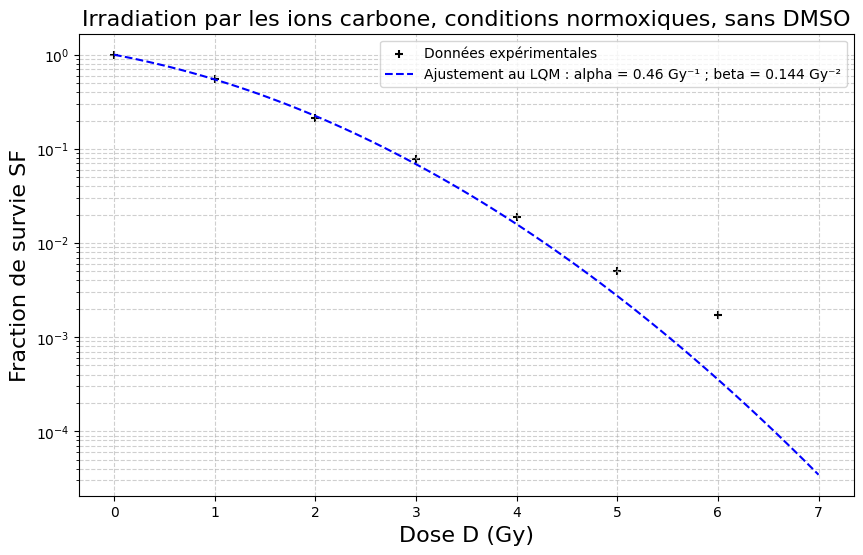

In [ ]:
#Graphe groupe 2
plt.figure(figsize=(10,6))
plt.scatter(D2_clean, SF2_clean, marker='+', color='black', label='Données expérimentales')
plt.plot(fit_doses2, fit_sf2, color='blue', linestyle='--', label=f'Ajustement au LQM : alpha = {alpha2:.2f} Gy\u207B\u00B9 ; beta = {beta2:.3f} Gy\u207B\u00B2')
plt.yscale('log')
plt.xlabel('Dose D (Gy)', fontsize=16)
plt.ylabel('Fraction de survie SF', fontsize=16)
plt.title('Irradiation par les ions carbone, conditions normoxiques, sans DMSO', fontsize=16)
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.show()

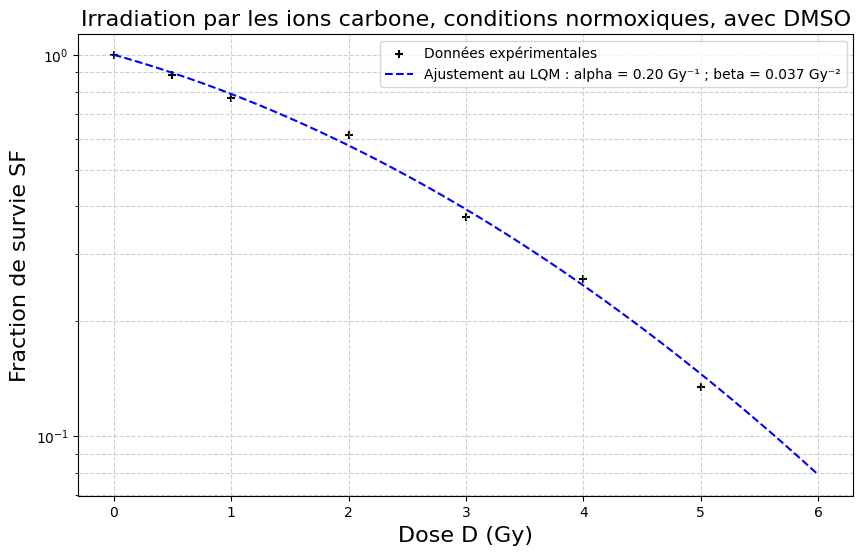

In [ ]:
#Graphe groupe 3
plt.figure(figsize=(10,6))
plt.scatter(D3_clean, SF3_clean, marker='+', color='black', label='Données expérimentales')
plt.plot(fit_doses3, fit_sf3, color='blue', linestyle='--', label=f'Ajustement au LQM : alpha = {alpha3:.2f} Gy\u207B\u00B9 ; beta = {beta3:.3f} Gy\u207B\u00B2')
plt.yscale('log')
plt.xlabel('Dose D (Gy)', fontsize=16)
plt.ylabel('Fraction de survie SF', fontsize=16)
plt.title('Irradiation par les ions carbone, conditions normoxiques, avec DMSO', fontsize=16)
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.show()

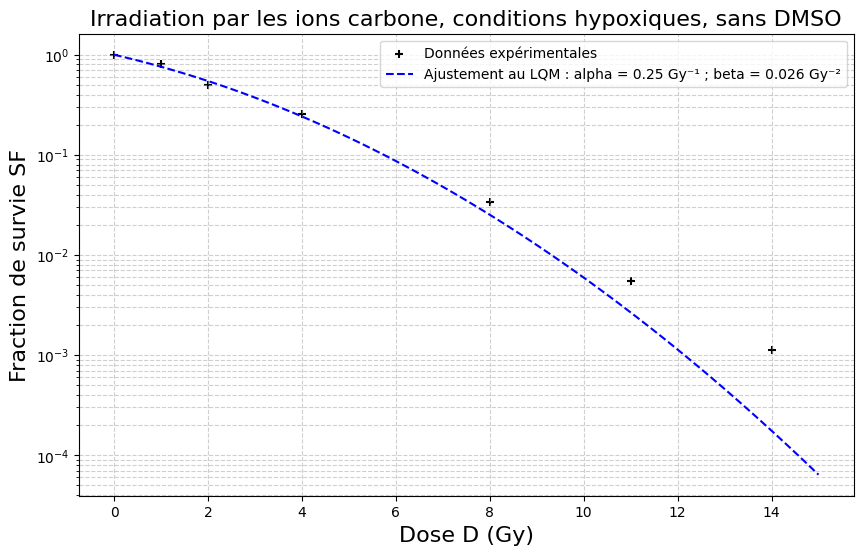

In [ ]:
#Graphe groupe 4
plt.figure(figsize=(10,6))
plt.scatter(D4_clean, SF4_clean, marker='+', color='black', label='Données expérimentales')
plt.plot(fit_doses4, fit_sf4, color='blue', linestyle='--', label=f'Ajustement au LQM : alpha = {alpha4:.2f} Gy\u207B\u00B9 ; beta = {beta4:.3f} Gy\u207B\u00B2')
plt.yscale('log')
plt.xlabel('Dose D (Gy)', fontsize=16)
plt.ylabel('Fraction de survie SF', fontsize=16)
plt.title('Irradiation par les ions carbone, conditions hypoxiques, sans DMSO', fontsize=16)
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.show()